In [49]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
file = requests.get(url=r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
with open('data.csv', mode='wb') as f:
    f.write(file.content)

In [24]:
df = pd.read_csv('data.csv')
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [27]:
print(df.Hours.isna().any())
print(df.Scores.isna().any())

False
False


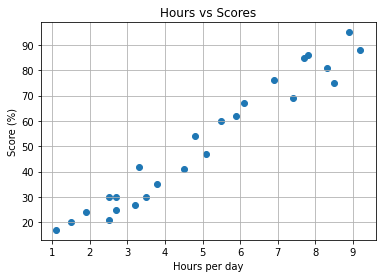

In [51]:
plt.scatter(df.Hours, df.Scores)
plt.ylabel('Score (%)')
plt.xlabel('Hours per day')
plt.title('Hours vs Scores')
plt.grid()
plt.show()

In [73]:
x = df[['Hours']]
y = df.Scores

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [74]:
lr = LinearRegression()

lr.fit(x_train, y_train)

print('Training complete')

Training complete


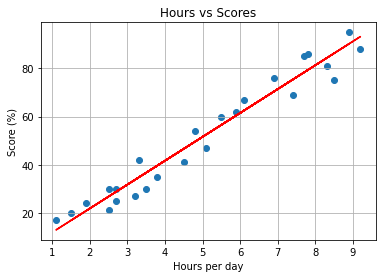

In [75]:
xplot = x
yplot = xplot * lr.coef_ + lr.intercept_

plt.scatter(df.Hours, df.Scores)
plt.plot(xplot, yplot, 'r')

plt.ylabel('Score (%)')
# plt.yticks(ticks = np.linspace(0,100,11))
plt.xlabel('Hours per day')
# plt.xticks(ticks=xplot)
plt.title('Hours vs Scores')

plt.grid()
plt.show()

In [81]:
hours = 9.25
print('Studying {} hours a day would result in a score of {} %'.format(hours, round(lr.predict([[hours]])[0], 2)))
# lr.predict([[9.25]])[0]

Studying 9.25 hours a day would result in a score of 93.69 %


In [76]:
y_pred = lr.predict(x_test)

comp_df = pd.DataFrame({'Pred':y_pred, 'True': y_test})
comp_df

,Pred,True
5,16.884145,20
2,33.732261,27
19,75.357018,69
16,26.794801,30
11,60.491033,62


In [85]:
from sklearn import metrics
print('R squared =',lr.score(x_test, y_test)*100 , ('%'))
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_pred=y_pred, y_true=y_test))

R squared = 94.54906892105355 %
Mean Absolute Error =  4.183859899002975
